In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [231]:
import random
import pandas as pd

# Definitions

A genetic algorithm is essentially an improved brute-forced method to find the optimal, or most _fit_, set of _variables_ within a set of allowed variables and their _domains_. We will first lay out the terminology that comes with genetic algorithms.

## Genotype

A genotype, is a variable, which in term is a changable entry in the DNA, which has a limited set of allowed values, which are called it's _domain_. 

For example, say we have a domain of all the letters, which we call $G = \{A,B,C,D,\ldots,Z\}$. The genotype will hold a value $g \in \mathbb{Z}$ such that the value corresponds to an entry in $G$. More concrete, if $g=2$ then the corresponding element in $G$ is $B$.

## DNA

The DNA of the sample holds all the values of the genotypes. This is defined as the set $D = \{ g_0, g_1, g_2, \ldots g_{n-1}, g_n\}$ where $g$ is a genotype.

## Population

The algorithm starts with a population of $N$ elements, where the _DNA_ of the sample is defined with uniform probability at the start. 

If for example $N=1000$, we create a set $P=\{d_1,d_2,d_3,\ldots,d_{1000}\}$, where $d$ is defined as DNA. All the genotypes in each DNA will point to a random value in domain of the genotype.

## Fitness

A certain configuration of DNA should be measured for _fitness_, which means how good this DNA scores. This is used to fill the mating pool, and ensures survival of the fittest.

### Fitness function

For our example, where each genotype in the DNA represents a letter, we want to match a certain sentence. Therefore we can define our fitness function as:

$$ f(\text{correct words}) = \text{correct words}$$

which will be an integer value between $[0, \text{sentence length}]$.

### Fitness curve

Instead of using a linear function, we can also apply a curve to the fitness function. Here is a list of basic functions which can be used to create a curve:

 * Linear (yes, not a curve): $x$.
 * Power: $a^x$.
 * Exponential: $e^x$.
 * Square-root: $\sqrt{x}$.
 * Logarithmic: $\ln x$.

## Mating pool

Based on the fitness, calculated with $f$, of each DNA, we want to create a mating pool. This can be done in two ways: a _probabilistic_ method or a _rank_ based method.

### Probabilistic method

With this method, we normalize the fitness for each DNA, expressed as $f_{norm}$:

$$ f_{norm} = \dfrac{ f(d) }{\sum\limits_{g\in D} f(d)} $$

As an example when there are only $4$ samples in the population. First we calculate $\sum_{g\in D} f(g)$, which in this case, is $26$.

|Sample|Fitness score|Fitness score (normalized)|
|---|---|---|
|$1$ | $12$ | $\dfrac{12}{26} \approx 0.462 $ |
|$2$ | $7$ | $\dfrac{7}{26} \approx 0.269 $ |
|$3$ | $5$ | $\dfrac{5}{26} \approx 0.192 $ |
|$4$ | $2$ | $\dfrac{2}{26} \approx 0.077 $ |

### Rank method

In some cases, where $f_{norm}$ ends up to be $0.98$ ($98\%$), sorting them by rank can fix the issue of overselecting. Simply sort all the elements descending by rank (ascending on fitness score), and divide the rank by $\dfrac{n(n+1)}{2}$ where $n$ is the number of ranks.

As an example, we have a population where one DNA scores very high. First we find the sum of rank numbers, there are $4$ samples, so we find:

$$ \dfrac{n(n+1)}{2} = \dfrac{4\cdot 5}{2} = 10 = 1+2+3+4$$

Then we sort them by rank, and normalize the rank score:

|Sample|Fitness score|Fitness score (normalized)|Rank|Rank (normalized)|
|---|---|---|---|---|
|$1$|$20$|$\dfrac{20}{24} \approx 0.833$|$4$|$\dfrac{4}{10} = 0.4$|
|$2$|$3$|$\dfrac{3}{24} = 0.125$|$3$|$\dfrac{3}{10}=0.3$|
|$3$|$2$|$\dfrac{2}{24} \approx 0.083$|$2$|$\dfrac{2}{10}=0.2$|
|$4$|$1$|$\dfrac{1}{24} \approx 0.042$|$1$|$\dfrac{1}{10}=0.1$|

### Selecting

To select a sample from the pool, we define a random value $r \in \mathbb{R}$ which is between $[0,1]$. The easiest way to pick a value, is to create a cumulative sum of the rank:

|Sample|Rank (norm.)|Rank (cumulative)|
|---|---|---|
|$1$|$0.4$|$0.4$|
|$2$|$0.3$|$0.7$|
|$3$|$0.2$|$0.9$|
|$4$|$0.1$|$1.0$|

Now we can check within which sample $r$ falls, e.g:

 * if $r < 0.4$ we select $1$.
 * if $0.4 \leq r < 0.7$ we select $2$.
 * if $0.7 \leq r < 0.9$ we select $3$.
 * if $ r \geq 0.9$ we select $4$.
 
This can easily be implemented as a loop, where we start with $a=0.4$ and add the cumulative probability to $a$, until $r\leq a$, which gives the sample.

## Crossover

We can create a crossover between DNA's in a few different methods. We can always split them $50/50$, or have a more skewed distribution. If we decide for each genotype by a coin flip, where we pick between $A$ or $B$ based on the outcome.

### Even crossover

The simplest case is where the first half of $A$'s DNA is picked, and the second half of $B$'s DNA. Another way would be to pick a mid value, and wrap the gene around the beginning and end (modulo for example).

### Skewed crossover

To get a more skewed crossover, we toss a coin and pick between $A$ or $B$'s genotype based on the outcome. We can also pick a random mid value, and don't wrap the set. All the values before the mid value go to $A$ and after the mid value to $B$.

## Mutation

To introduce new genotypes into the DNA, we can apply a mutation factor $m$, which should be a low value, e.g.: $0.01, 0.02, 0.05$. Then every genotype is being checked for a random value $r<m$, for which a new random value is picked from the genotypes domain.

# Algorithm

# Implementation

First we define the domain. We will pick values from the ASCII table, that will enable us to construct the sentence: _to be or not to be, thats the question_. Notice that I dropped `'` to make it easier.

In [32]:
domain =  [chr(x) for x in range(65, 91)]\
        + [chr(x) for x in range(97, 123)]\
        + [',', ' ']
    
len(domain)

54

In [92]:
sentence = [ord(l) for l in "To be or not to be, thats the question"]
sentence[:17]

[84, 111, 32, 98, 101, 32, 111, 114, 32, 110, 111, 116, 32, 116, 111, 32, 98]

We can quickly check if the domain $D$ covers the sentence $S$. We want to find all the elements in $S$ that are not in $D$, or simply $S-D$:

In [97]:
set(sentence) - set([ord(d) for d in domain])

set()

An empty set, which is good, this means we have all the elements in our domain. Next we create a genotype class that will help is to initialize to a random value, and convert between the genotype and phenotype quickly.

In [121]:
class Genotype():
    
    def __init__(self, domain, value = -1):
        self.D = domain
        self.value = value if value >= 0 else self.rand_int()
        if self.value < 0 or self.value >= len(D): raise ValueError('Value not within domain.')
            
    def __repr__(self):
        return 'Genotype {} with phenotype {}'.format(self.value, self.D[self.value])
        
    def rand_int(self):
        return random.randint(0, len(D)-1)
        
    def rand(self):
        return self.D[self.rand_int()]
    
    def phenotype(self):
        return self.D[self.value]

Let's test if the genotype works as expected:

In [122]:
g = Genotype(domain)
print('Genotype {} with phenotype {}'.format(g.value, g.phenotype()))

Genotype 27 with phenotype b


In [123]:
g

Genotype 27 with phenotype b

That seems corrrect, we can get the genotype value like this:

In [215]:
d.genotypes[0].value

40

Now we are going to create a DNA class, which generates a set of genotypes based on a length. We will also add a fitness function to determine the fitness for this DNA.

In [467]:
class DNA():
    
    def __init__(self, length, D):
        if length % 2 == 1: raise ValueError('Length must be multiple of 2.') # to ensure we can split it evenly in two
        self.genotypes = [Genotype(D) for _ in range(length)]
        
    def __repr__(self):
        return ''.join( [g.phenotype() for g in self.genotypes] )
    
    def fitness(self, sentence):
        if len(sentence) is not len(self.genotypes): 
            raise ValueError('Sentence and genotypes have invalid dimension.')
        return sum([1 for x in range(len(sentence)) if sentence[x] == self.genotypes[x].value])

Let's see how the DNA look's phonetically:

In [229]:
d = DNA(len(sentence), domain)
d

SDWvV,EW Aulna,qvG,fVyHvrSTHTTqlpfWOQv

It seems to be working properly. Next is the fitness function, which will probably be very low, let's see:

In [230]:
d.fitness(sentence)

0.0

Hmmm, let's try to find the fitness for $100.000$ initial DNA's:

In [218]:
fitness = []
for i in range(100000):
    fitness.append(DNA(len(sentence), domain).fitness(sentence))

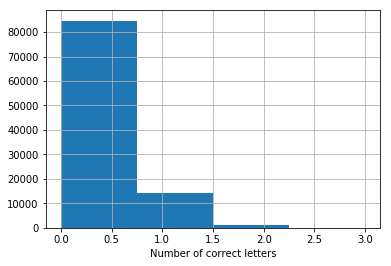

In [227]:
hist(fitness, bins=len(set(fitness)))
xlabel('Number of correct letters')
grid()

This is a very poor result. Based on a random initialization, we never get more than $3$ characters correct. Let's see how many times we have $3$ correct characters.

In [225]:
print(sum([1 for x in fitness if x >= 3]))

41


The probability for this scenario to occur, is:

In [422]:
print('{}%'.format(41/100000*100))

0.041%


Let's create a table for $100$ DNA's and calculate their fitness scores.

In [518]:
N = 100
df = pd.DataFrame()
df['DNA'] = [DNA(len(sentence), domain) for _ in range(N)]
df['fitness'] = [dna.fitness(sentence) for dna in df['DNA']]
df['accuracy'] = df['fitness'] / len(sentence)
df = df.sort_values(by=['fitness'], ascending=False)
df['fitness_norm'] = df['fitness'] / df['fitness'].sum()
df['fitness_norm_cum'] = df['fitness_norm'].cumsum()
df[:10]

,DNA,fitness,accuracy,fitness_norm,fitness_norm_cum
30,"yKgJsFwjNcjORfVhQnsvmnZUcMdpxbBP,uxEvw",2.0,0.052632,0.10,0.10
99,PahREqthtVABwSiDYWXJgloxAOJangWVUdmMwU,1.0,0.026316,0.05,0.15
85,fuG rsXLFSlquZFMk eWFfrthgaFGwuWhDJDkM,1.0,0.026316,0.05,0.20
32,"innpjCBwssGGrSTgiDmHe,SzOvCpzmwMeORORV",1.0,0.026316,0.05,0.25
75,"NGWuguUlgXhhMGWDeSl,XTCfmfvMvem mfJBR,",1.0,0.026316,0.05,0.30
29,"CCoHnJck,KrkJYrkZDjgbuWQUh,dEHckRNZEth",1.0,0.026316,0.05,0.35
26,"UcPdNgCgAsYeOOUfJSvpuaSt,RfR,TtivYXeBx",1.0,0.026316,0.05,0.40
78,uQgjNqeJuHwiZhGEQyXdXNxkIcDuRmpAUFKZlW,1.0,0.026316,0.05,0.45
37,aV bEZwuLkbEfKXXQzsYSRzkuqYlJXUKrUYlyn,1.0,0.026316,0.05,0.50
23,"WSI QvBrF,lSvDzvrRsHgePcgfHeABFHAihbIk",1.0,0.026316,0.05,0.55


A simple helper for a random float between $[0,1]$.

In [519]:
def rand(): 
    return random.randint(0,100000)/100000

In [520]:
rand()

0.31022

This function uses the selection algorithm described earlier. We don't need to compute $a$ because we have already computed the cumulative sum of the normalized fitness score.

In [521]:
def pick(df):
    r = rand()
    last_index=0
    for index, row in df.iterrows():
        if r <= row['fitness_norm_cum'] + 0.00000001:  # add epsilon to remove some rounding errors.
            return index  

In [522]:
pick(df)

85

Let's see the distribution for the DNA's that are being picked:

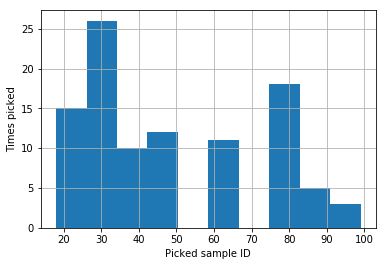

In [551]:
picks = [pick(df) for _ in range(N)]
hist(picks)
xlabel('Picked sample ID')
ylabel('Times picked')
grid()

Compared to the top 5, we find that:

In [524]:
df[:5]

,DNA,fitness,accuracy,fitness_norm,fitness_norm_cum
30,"yKgJsFwjNcjORfVhQnsvmnZUcMdpxbBP,uxEvw",2.0,0.052632,0.10,0.10
99,PahREqthtVABwSiDYWXJgloxAOJangWVUdmMwU,1.0,0.026316,0.05,0.15
85,fuG rsXLFSlquZFMk eWFfrthgaFGwuWhDJDkM,1.0,0.026316,0.05,0.20
32,"innpjCBwssGGrSTgiDmHe,SzOvCpzmwMeORORV",1.0,0.026316,0.05,0.25
75,"NGWuguUlgXhhMGWDeSl,XTCfmfvMvem mfJBR,",1.0,0.026316,0.05,0.30


Let's start with a simple crossover function that picks half from $A$ and the other half from $B$:

In [486]:
def crossover(genotypes_A, genotypes_B):
    if len(genotypes_A) is not len(genotypes_B): raise ValueError('A and B must have the same dimension.')
    N2 = len(genotypes_A) // 2
    return genotypes_A[:N2] + genotypes_B[N2:]

In [529]:
C = crossover(df['DNA'][99].genotypes, df['DNA'][30].genotypes)
C

[Genotype 15 with phenotype P,
 Genotype 26 with phenotype a,
 Genotype 33 with phenotype h,
 Genotype 17 with phenotype R,
 Genotype 4 with phenotype E,
 Genotype 42 with phenotype q,
 Genotype 45 with phenotype t,
 Genotype 33 with phenotype h,
 Genotype 45 with phenotype t,
 Genotype 21 with phenotype V,
 Genotype 0 with phenotype A,
 Genotype 1 with phenotype B,
 Genotype 48 with phenotype w,
 Genotype 18 with phenotype S,
 Genotype 34 with phenotype i,
 Genotype 3 with phenotype D,
 Genotype 24 with phenotype Y,
 Genotype 22 with phenotype W,
 Genotype 23 with phenotype X,
 Genotype 47 with phenotype v,
 Genotype 38 with phenotype m,
 Genotype 39 with phenotype n,
 Genotype 25 with phenotype Z,
 Genotype 20 with phenotype U,
 Genotype 28 with phenotype c,
 Genotype 12 with phenotype M,
 Genotype 29 with phenotype d,
 Genotype 41 with phenotype p,
 Genotype 49 with phenotype x,
 Genotype 27 with phenotype b,
 Genotype 1 with phenotype B,
 Genotype 15 with phenotype P,
 Genotype 52 

Verify that the function returns the same length of genotypes:

In [530]:
len(df['DNA'][0].genotypes) == len(C)

True

Let's see if the fitness of the crossover DNA has an improved fitness score:

In [531]:
crossover_sample = DNA(len(sentence), domain)
crossover_sample.genotypes = C
crossover_sample.fitness(sentence)

0.0

Meh. What if we swap the crossover:

In [532]:
crossover_sample.genotypes = crossover(df['DNA'][30].genotypes, df['DNA'][99].genotypes)
crossover_sample.fitness(sentence)

3

In [533]:
crossover_sample

yKgJsFwjNcjORfVhQnsJgloxAOJangWVUdmMwU

In [535]:
''.join([chr(c) for c in sentence])

'To be or not to be, thats the question'

In [547]:
[chr(c) for c in set([g.value for g in crossover_sample.genotypes]) & set(sentence)]

[' ', ',']

We can conclude that two spaces, and `,` are correct.

# Analysis